In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
### Import libraries ###
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loading data

In [3]:
# Unbalanced data
df_test = pd.read_csv('../input/k/cmbernardi/wids-data-preparation/df_test.csv')
df_train = pd.read_csv('../input/k/cmbernardi/wids-data-preparation/df_train.csv')

# SMOTE data
df_train_sm = pd.read_csv('/kaggle/input/k/cmbernardi/wids-data-preparation/df_train_preprocessed.csv')
df_test_sm = pd.read_csv('/kaggle/input/k/cmbernardi/wids-data-preparation/df_test_preprocessed.csv')

# Test data with id to submit
icu_test_df = pd.read_csv('../input/widsdatathon2021/UnlabeledWiDS2021.csv')

In [4]:
# Splitting training set

train_X = df_train.drop('diabetes_mellitus', axis=1)
train_y = df_train['diabetes_mellitus']

train_X_sm = df_train_sm.drop('diabetes_mellitus', axis=1)
train_y_sm = df_train_sm['diabetes_mellitus']

# Scaling data
from sklearn.preprocessing import StandardScaler

train_X_ss = StandardScaler().fit_transform(train_X.values)
train_X = pd.DataFrame(train_X_ss, index=train_X.index, columns=train_X.columns)

# Feature Selection by Extra-Trees Regressor

In [5]:
def extra_tree_reg(train_X, train_y):

    from sklearn.tree import ExtraTreeRegressor

    # Build a forest and compute the feature importances
    forest = ExtraTreeRegressor(splitter='best', max_leaf_nodes=500)
    forest.fit(train_X, train_y)
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(train_X.shape[1]):
        print("%d. feature %d %s (%f)" % (f + 1, indices[f], train_X.columns[indices[f]], importances[indices[f]]))

    return importances, indices

In [6]:
importances_etr, indices_etr = extra_tree_reg(train_X, train_y)

Feature ranking:
1. feature 78 d1_glucose_max (0.605821)
2. feature 1 bmi (0.048170)
3. feature 16 gcs_verbal_apache (0.019939)
4. feature 77 d1_creatinine_min (0.019787)
5. feature 0 age (0.017299)
6. feature 79 d1_glucose_min (0.016561)
7. feature 10 arf_apache (0.015346)
8. feature 6 weight (0.013021)
9. feature 92 d1_wbc_max (0.011816)
10. feature 18 heart_rate_apache (0.010247)
11. feature 32 d1_heartrate_max (0.008551)
12. feature 17 glucose_apache (0.007988)
13. feature 8 apache_3j_diagnosis (0.007710)
14. feature 75 d1_calcium_min (0.007703)
15. feature 87 d1_platelets_min (0.007659)
16. feature 7 apache_2_diagnosis (0.006270)
17. feature 84 d1_hematocrit_max (0.005765)
18. feature 73 d1_bun_min (0.005755)
19. feature 20 intubated_apache (0.005266)
20. feature 4 pre_icu_los_days (0.004573)
21. feature 82 d1_hemaglobin_max (0.004560)
22. feature 94 h1_glucose_max (0.004496)
23. feature 63 h1_sysbp_min (0.004434)
24. feature 26 ventilated_apache (0.004357)
25. feature 43 d1_sysbp

In [12]:
importances_etr_sm, indices_etr_sm = extra_tree_reg(train_X_sm, train_y_sm)

Feature ranking:
1. feature 78 d1_glucose_max (0.333914)
2. feature 501 bmi_cat_Obese (0.231398)
3. feature 506 d1_glucose_max_cat_pre-diabetic (0.110500)
4. feature 16 gcs_verbal_apache (0.041307)
5. feature 505 d1_glucose_max_cat_normal glycemic (0.040229)
6. feature 502 bmi_cat_Overweight (0.040148)
7. feature 104 ethnicity_Caucasian (0.028280)
8. feature 10 arf_apache (0.024695)
9. feature 26 ventilated_apache (0.021961)
10. feature 507 d1_glucose_min_cat_hypoglycemic (0.019630)
11. feature 509 d1_glucose_min_cat_pre-diabetic (0.017538)
12. feature 0 age (0.008619)
13. feature 514 h1_glucose_min_cat_normal glycemic (0.004759)
14. feature 77 d1_creatinine_min (0.003558)
15. feature 133 icu_type_Med-Surg ICU (0.003391)
16. feature 111 hospital_admit_source_Emergency Department (0.003372)
17. feature 13 gcs_eyes_apache (0.003309)
18. feature 108 gender_M (0.003111)
19. feature 508 d1_glucose_min_cat_normal glycemic (0.002544)
20. feature 1 bmi (0.002404)
21. feature 8 apache_3j_diagno

In [46]:
# Plotting features

def plotting_feat_imp(importances, train_X, name):
    
    feature_imp = pd.DataFrame(sorted(zip(importances,train_X.columns)), columns=['Value','Feature'])
    data=feature_imp.sort_values(by="Value", ascending=False)
    data = data.iloc[0:30, :]
    plt.figure(figsize=(10, 10))
    sns.barplot(x="Value", y="Feature", data=data)
    plt.title(name)
    plt.tight_layout()

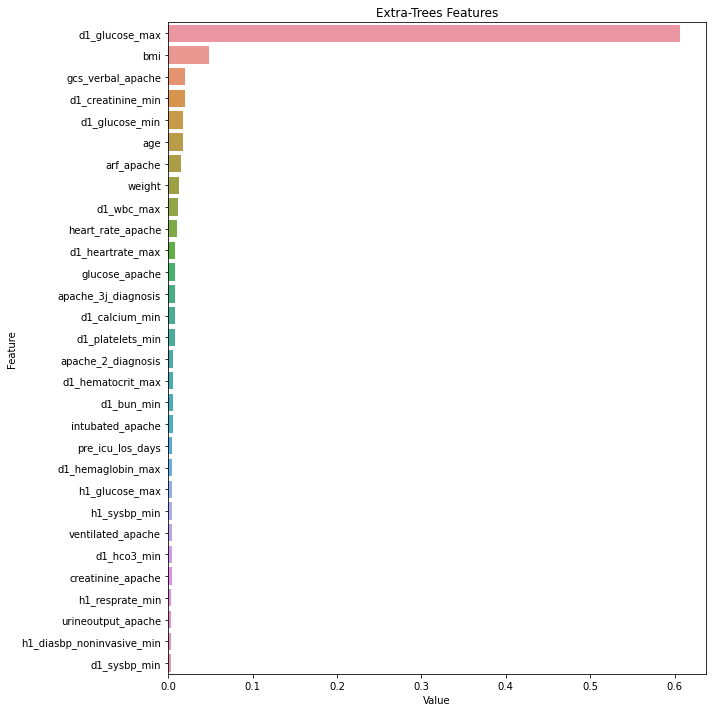

In [47]:
plotting_feat_imp(importances_etr, train_X, 'Extra-Trees Features')

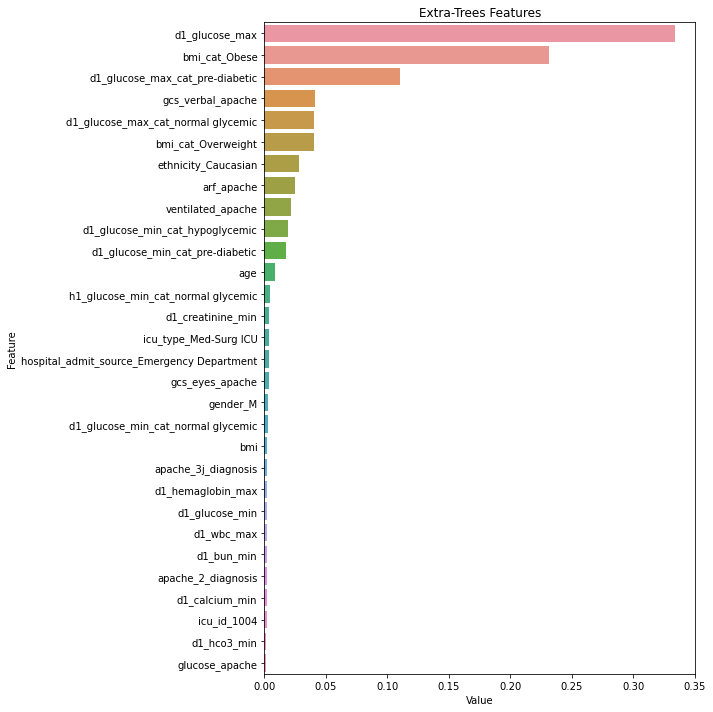

In [48]:
plotting_feat_imp(importances_etr_sm, train_X_sm, 'Extra-Trees Features')

# Feature Selection by LASSO

In [13]:
def get_lasso(train_X, train_y):
    
    from sklearn.linear_model import LassoCV

    lasso = LassoCV().fit(train_X.values, train_y)
    importance = np.abs(lasso.coef_)
    indices = np.argsort(importance)[::-1]

    # Print the feature ranking
    print("Feature ranking by LASSO:")

    for f in range(train_X.shape[1]):
        print("%d. feature %d %s (%f)" % (f + 1, indices[f], train_X.columns[indices[f]], importance[indices[f]]))
    
    return importance, indices

In [14]:
importances_lasso, indices_lasso = get_lasso(train_X, train_y)

Feature ranking by LASSO:
1. feature 78 d1_glucose_max (0.103688)
2. feature 505 d1_glucose_max_cat_normal glycemic (0.099856)
3. feature 506 d1_glucose_max_cat_pre-diabetic (0.071974)
4. feature 514 h1_glucose_min_cat_normal glycemic (0.035129)
5. feature 82 d1_hemaglobin_max (0.032203)
6. feature 10 arf_apache (0.027975)
7. feature 507 d1_glucose_min_cat_hypoglycemic (0.025349)
8. feature 504 d1_glucose_max_cat_hypoglycemic (0.025152)
9. feature 0 age (0.021435)
10. feature 6 weight (0.020249)
11. feature 501 bmi_cat_Obese (0.019256)
12. feature 85 d1_hematocrit_min (0.019254)
13. feature 1 bmi (0.018797)
14. feature 75 d1_calcium_min (0.018434)
15. feature 95 h1_glucose_min (0.018327)
16. feature 73 d1_bun_min (0.018117)
17. feature 513 h1_glucose_min_cat_hypoglycemic (0.017708)
18. feature 459 icu_id_1029 (0.016577)
19. feature 92 d1_wbc_max (0.016350)
20. feature 79 d1_glucose_min (0.016250)
21. feature 463 icu_id_1035 (0.015377)
22. feature 240 icu_id_434 (0.015243)
23. feature 9

In [15]:
importances_lasso_sm, indices_lasso_sm = get_lasso(train_X_sm, train_y_sm)

Feature ranking by LASSO:
1. feature 78 d1_glucose_max (0.453881)
2. feature 505 d1_glucose_max_cat_normal glycemic (0.358223)
3. feature 504 d1_glucose_max_cat_hypoglycemic (0.235525)
4. feature 0 age (0.197145)
5. feature 506 d1_glucose_max_cat_pre-diabetic (0.183615)
6. feature 10 arf_apache (0.179145)
7. feature 6 weight (0.174537)
8. feature 82 d1_hemaglobin_max (0.166032)
9. feature 501 bmi_cat_Obese (0.136272)
10. feature 75 d1_calcium_min (0.095018)
11. feature 92 d1_wbc_max (0.093639)
12. feature 32 d1_heartrate_max (0.088419)
13. feature 507 d1_glucose_min_cat_hypoglycemic (0.085535)
14. feature 502 bmi_cat_Overweight (0.054748)
15. feature 104 ethnicity_Caucasian (0.053128)
16. feature 129 icu_type_CSICU (0.043365)
17. feature 14 gcs_motor_apache (0.041453)
18. feature 49 h1_diasbp_min (0.040760)
19. feature 514 h1_glucose_min_cat_normal glycemic (0.037723)
20. feature 13 gcs_eyes_apache (0.037248)
21. feature 48 h1_diasbp_max (0.036505)
22. feature 42 d1_sysbp_max (0.028115

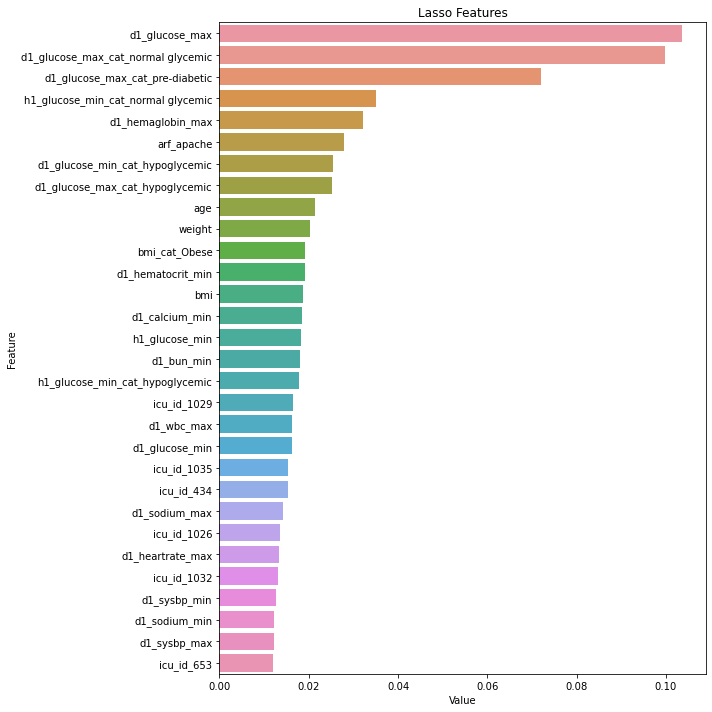

In [52]:
plotting_feat_imp(importances_lasso, train_X, 'Lasso Features')

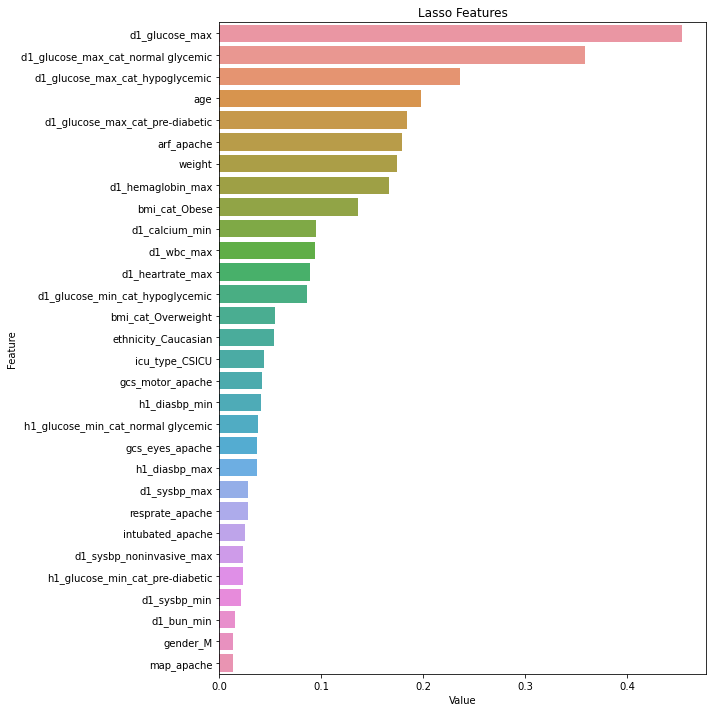

In [53]:
plotting_feat_imp(importances_lasso_sm, train_X_sm, 'Lasso Features')

In [54]:
same_features = []

for i in indices_etr[0:20]:
    if i in indices_lasso[0:20]:
        same_features.append(i)

In [55]:
print('Same features selected by ETR and LASSO using imbalanced data: ', len(same_features))

Same features selected by ETR and LASSO using imbalanced data:  9


In [56]:
same_features_2 = []

for i in indices_etr_sm[0:20]:
    if i in indices_lasso_sm[0:20]:
        same_features_2.append(i)

In [57]:
print('Same features selected by ETR and LASSO using SMOTE data: ', len(same_features_2))

Same features selected by ETR and LASSO using SMOTE data:  11


In [58]:
same_features_3 = []

for i in indices_etr[0:20]:
    if i in indices_etr_sm[0:20]:
        same_features_3.append(i)

In [59]:
print('Same features selected by ETR using SMOTE and imbalanced data: ', len(same_features_3))

Same features selected by ETR using SMOTE and imbalanced data:  6


In [60]:
same_features_4 = []

for i in indices_lasso[0:20]:
    if i in indices_lasso_sm[0:20]:
        same_features_4.append(i)

In [61]:
print('Same features selected by LASSO using SMOTE and imbalanced data: ', len(same_features_4))

Same features selected by LASSO using SMOTE and imbalanced data:  13


### Features selected by Extra-Trees Regressor

In [16]:
# Features selected imbalanced data
train_1 = df_train[df_train.columns[indices_etr[0:20]]]
test_1 = df_test[df_test.columns[indices_etr[0:20]]]

# Features selected by SMOTE data
train_2 = df_train_sm[df_train_sm.columns[indices_etr_sm[0:20]]]
test_2 = df_test_sm[df_test_sm.columns[indices_etr_sm[0:20]]]

### Features selected by LASSO

In [17]:
# Features selected imbalanced data
train_3 = df_train[df_train.columns[indices_lasso[0:20]]]
test_3 = df_test[df_test.columns[indices_lasso[0:20]]]

# Features selected by SMOTE data
train_4 = df_train_sm[df_train_sm.columns[indices_lasso_sm[0:20]]]
test_4 = df_test_sm[df_test_sm.columns[indices_lasso_sm[0:20]]]

**After preprocessing the data I created 4 groups of features to be tested:**

1. Features without previous treatment for imbalanced class AND selected by ETR.
2. Features treated with SMOTE AND selected by ETR.
3. Features without previous treatment for imbalanced class AND selected by LASSO.
4. Features treated with SMOTE AND selected by LASSO.

*Some features were selected by all groups and 'd1_glucose_max' was the best feature in all groups.*

# Model training

In [8]:
from sklearn.model_selection import cross_val_score

def validate_models(X, y, model):
    
    return cross_val_score(model, X, y, cv=10, scoring='roc_auc')

In [9]:
def train_predict(X, y, df_test, model):
    
    model.fit(X,y)
    pred = model.predict_proba(df_test)[:, 1]
    #pd.Series(pred).plot.kde();
    
    return pred

### Random Forest Classifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced_subsample") 

In [18]:
scores_rf_1 = validate_models(train_1, train_y, rf)
scores_rf_2 = validate_models(train_2, train_y_sm, rf)
scores_rf_3 = validate_models(train_3, train_y, rf)
scores_rf_4 = validate_models(train_4, train_y_sm, rf)

### XGBoost

In [19]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(learning_rate=0.01, # MAKES THE MODEL MORE ROBUST BY SHRINKING THE WEIGHTS OF EACH STEP 
                        n_estimators=350,
                        max_depth=3, # CONTROL OVERFITTING
                        max_leaves=15, # CONTROL OVERFITTING
                        subsample=0.8, # CONTROL UNDER/OVER-FITTING
                        colsample_bytree=0.6, # CONTROL UNDER/OVER-FITTING
                        gamma=1, # SPECIFIES THE MINIMUM LOSS REDUCTION TO MAKE A SPLIT
                        objective='binary:logistic',
                        min_child_weight=1, # CONTROL OVERFITTING
                        eval_metric='auc',
                        scale_pos_weight=0.73 # UNBALANCED CLASS
                       )

In [20]:
scores_xg_1 = validate_models(train_1, train_y, xgboost)
scores_xg_2 = validate_models(train_2, train_y_sm, xgboost)
scores_xg_3 = validate_models(train_3, train_y, xgboost)
scores_xg_4 = validate_models(train_4, train_y_sm, xgboost)

### LightGBM

In [21]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(learning_rate=0.05,
                    max_depth=3,
                    reg_alpha=1,
                    reg_lambda=1,
                    objective='binary',
                    metric='auc',
                    n_jobs=-1,
                    n_estimators=5000,
                    feature_fraction_seed=42,
                    bagging_seed=42,
                    boosting_type='gbdt',
                    boost_from_average=False,
                    is_unbalance=True
                    )

In [22]:
scores_lg_1 = validate_models(train_1, train_y, lgbm)
scores_lg_2 = validate_models(train_2, train_y_sm, lgbm)
scores_lg_3 = validate_models(train_3, train_y, lgbm)
scores_lg_4 = validate_models(train_4, train_y_sm, lgbm)

### Comparing Models

In [23]:
model = ['Random Forest', 'XGBoost', 'LightGBM']
group_1 = [scores_rf_1.mean(), scores_xg_1.mean(), scores_lg_1.mean()]
group_2 = [scores_rf_2.mean(), scores_xg_2.mean(), scores_lg_2.mean()]
group_3 = [scores_rf_3.mean(), scores_xg_3.mean(), scores_lg_3.mean()]
group_4 = [scores_rf_4.mean(), scores_xg_4.mean(), scores_lg_4.mean()]
group_1_std = [scores_rf_1.std(), scores_xg_1.std(), scores_lg_1.std()]
group_2_std = [scores_rf_2.std(), scores_xg_2.std(), scores_lg_2.std()]
group_3_std = [scores_rf_3.std(), scores_xg_3.std(), scores_lg_3.std()]
group_4_std = [scores_rf_4.std(), scores_xg_4.std(), scores_lg_4.std()]

performance = pd.DataFrame({'Model': model,
                            'ROC-score (Group 1)': group_1,
                            'Std (Group 1)': group_1_std,
                            'ROC-score (Group 2)': group_2,
                            'Std (Group 2)': group_2_std,
                            'ROC-score (Group 3)': group_3,
                            'Std (Group 3)': group_3_std,
                            'ROC-score (Group 4)': group_4,
                            'Std (Group 4)': group_4_std,
                           })

In [24]:
performance

,Model,ROC-score (Group 1),Std (Group 1),ROC-score (Group 2),Std (Group 2),ROC-score (Group 3),Std (Group 3),ROC-score (Group 4),Std (Group 4)
0,Random Forest,0.835484,0.018955,0.943866,0.083045,0.824646,0.020686,0.945264,0.074406
1,XGBoost,0.823415,0.018394,0.933457,0.073662,0.819367,0.019462,0.922768,0.069037
2,LightGBM,0.843286,0.018557,0.947126,0.080631,0.831517,0.020933,0.943337,0.086833


### Plotting ROC/AUC Curve for Group of Features 1

In [74]:
from sklearn.model_selection import train_test_split

trainX, testX, trainy, testy = train_test_split(train_1, train_y, test_size=0.3, random_state=2)

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# Random Forest
rf_probs = train_predict(trainX, trainy, testX, rf)

# XGBoost
xgboost_probs = train_predict(trainX, trainy, testX, xgboost)

# LighGBM
lgbm_probs = train_predict(trainX, trainy, testX, lgbm)

# keep probabilities for the positive outcome only
rf_probs = rf_probs
xgboost_probs = xgboost_probs
lgbm_probs = lgbm_probs

# calculate scores
rf_auc = roc_auc_score(testy, rf_probs)
xgboost_auc = roc_auc_score(testy, xgboost_probs)
lgbm_auc = roc_auc_score(testy, lgbm_probs)

# calculate roc curves
rf_fpr, rf_tpr, t1 = roc_curve(testy, rf_probs)
xgboost_fpr, xgboost_tpr, t2 = roc_curve(testy, xgboost_probs)
lgbm_fpr, lgbm_tpr, t3 = roc_curve(testy, lgbm_probs)

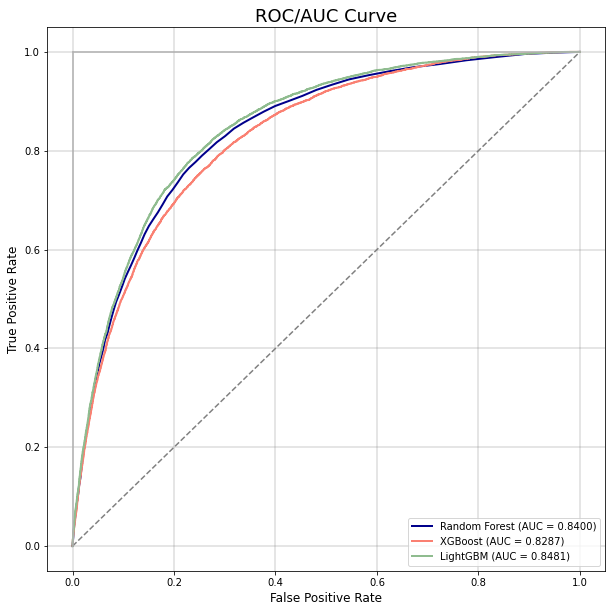

In [76]:
plt.figure(figsize=(10,10))
plt.title('ROC/AUC Curve', fontsize=18)
plt.plot(rf_fpr, rf_tpr, color='darkblue', label='Random Forest (AUC = %0.4f)' % ((rf_auc)),lw=2, alpha=1)
plt.plot(xgboost_fpr, xgboost_tpr, color='salmon', label='XGBoost (AUC = %0.4f)' % ((xgboost_auc)),lw=2, alpha=1)
plt.plot(lgbm_fpr, lgbm_tpr, color='darkseagreen', label='LightGBM (AUC = %0.4f)' % ((lgbm_auc)),lw=2, alpha=1)
plt.plot([0, 1], ls="--", color='grey')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.grid(b=True, which='major', color='grey', linewidth=0.4)
plt.legend(fontsize=10);

# Predicting and Submitting test data

#### Random Forest

In [77]:
# pred_rf_1 = train_predict(train_1, train_y, test_1, rf)
# pred_rf_2 = train_predict(train_2, train_y_sm, test_2, rf)
# pred_rf_3 = train_predict(train_3, train_y, test_3, rf)
# pred_rf_4 = train_predict(train_4, train_y_sm, test_4, rf)

In [78]:
# icu_test_df['diabetes_mellitus'] = pred_rf_1
# icu_test_df[["encounter_id", "diabetes_mellitus"]].to_csv("submission_rf_1.csv", index=False)

In [79]:
# icu_test_df['diabetes_mellitus'] = pred_rf_2
# icu_test_df[["encounter_id", "diabetes_mellitus"]].to_csv("submission_rf_2.csv", index=False)

In [80]:
# icu_test_df['diabetes_mellitus'] = pred_rf_3
# icu_test_df[["encounter_id", "diabetes_mellitus"]].to_csv("submission_rf_3.csv", index=False)

In [81]:
# icu_test_df['diabetes_mellitus'] = pred_rf_4
# icu_test_df[["encounter_id", "diabetes_mellitus"]].to_csv("submission_rf_4.csv", index=False)

#### XGBoost

In [82]:
# pred_xg_1 = train_predict(train_1, train_y, test_1, xgboost)
# pred_xg_2 = train_predict(train_2, train_y_sm, test_2, xgboost)
# pred_xg_3 = train_predict(train_3, train_y, test_3, xgboost)
# pred_xg_4 = train_predict(train_4, train_y_sm, test_4, xgboost)

In [83]:
# icu_test_df['diabetes_mellitus'] = pred_xg_2
# icu_test_df[["encounter_id", "diabetes_mellitus"]].to_csv("submission_xg_2.csv", index=False)

In [84]:
# icu_test_df['diabetes_mellitus'] = pred_xg_1
# icu_test_df[["encounter_id", "diabetes_mellitus"]].to_csv("submission_xg_1.csv", index=False)

In [85]:
# icu_test_df['diabetes_mellitus'] = pred_xg_3
# icu_test_df[["encounter_id", "diabetes_mellitus"]].to_csv("submission_xg_3.csv", index=False)

In [86]:
# icu_test_df['diabetes_mellitus'] = pred_xg_4
# icu_test_df[["encounter_id", "diabetes_mellitus"]].to_csv("submission_xg_4.csv", index=False)

#### LightGBM

In [87]:
# pred_lg_1 = train_predict(train_1, train_y, test_1, lgbm)
# pred_lg_2 = train_predict(train_2, train_y_sm, test_2, lgbm)
# pred_lg_3 = train_predict(train_3, train_y, test_3, lgbm)
# pred_lg_4 = train_predict(train_4, train_y_sm, test_4, lgbm)

In [88]:
# icu_test_df['diabetes_mellitus'] = pred_lg_1
# icu_test_df[["encounter_id", "diabetes_mellitus"]].to_csv("submission_lg_1.csv", index=False)

In [89]:
# icu_test_df['diabetes_mellitus'] = pred_lg_2
# icu_test_df[["encounter_id", "diabetes_mellitus"]].to_csv("submission_lg_2.csv", index=False)

In [90]:
# icu_test_df['diabetes_mellitus'] = pred_lg_3
# icu_test_df[["encounter_id", "diabetes_mellitus"]].to_csv("submission_lg_3.csv", index=False)

In [91]:
# icu_test_df['diabetes_mellitus'] = pred_lg_4
# icu_test_df[["encounter_id", "diabetes_mellitus"]].to_csv("submission_lg_4.csv", index=False)

# Evaluating Models

In [25]:
# Create df with scores from test dataset

performance.insert(loc=3, column='Test-score (Group 1)', value=[0.83129, 0.81940, 0.84252])
performance.insert(loc=6, column='Test-score (Group 2)', value=[0.79380, 0.80623, 0.77793])
performance.insert(loc=9, column='Test-score (Group 3)', value=[0.81499, 0.80994, 0.82252])
performance.insert(loc=12, column='Test-score (Group 4)', value=[0.80134, 0.80764, 0.73104])

def highlight_cols(x):
    
    # copy df to new - original data is not changed 
    df = x.copy() 
    
     # select all values to grey color 
    df.loc[:, :] = 'background-color: grey'
      
    # overwrite values green color 
    df[['Test-score (Group 1)', 'Test-score (Group 2)', 'Test-score (Group 3)', 'Test-score (Group 4)']] = 'background-color: green'

    return df    

performance.style.apply(highlight_cols, axis=None)

,Model,ROC-score (Group 1),Std (Group 1),Test-score (Group 1),ROC-score (Group 2),Std (Group 2),Test-score (Group 2),ROC-score (Group 3),Std (Group 3),Test-score (Group 3),ROC-score (Group 4),Std (Group 4),Test-score (Group 4)
0,Random Forest,0.835484,0.018955,0.831290,0.943866,0.083045,0.793800,0.824646,0.020686,0.814990,0.945264,0.074406,0.801340
1,XGBoost,0.823415,0.018394,0.819400,0.933457,0.073662,0.806230,0.819367,0.019462,0.809940,0.922768,0.069037,0.807640
2,LightGBM,0.843286,0.018557,0.842520,0.947126,0.080631,0.777930,0.831517,0.020933,0.822520,0.943337,0.086833,0.731040


Text(0.5, 1.0, 'Random Forest Performance')

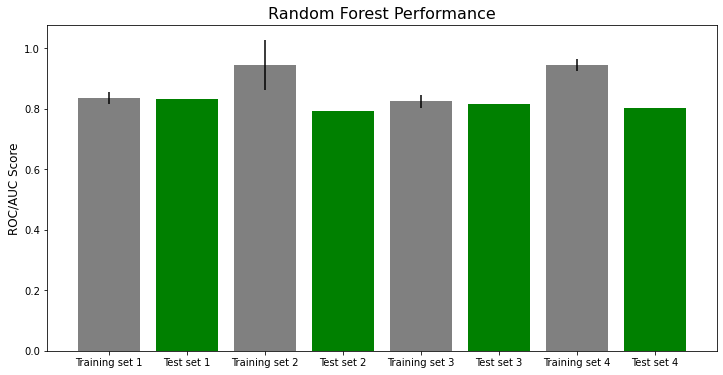

In [27]:
bars_rf = [scores_rf_1.mean(), 0.831290, scores_rf_2.mean(), 0.793800, scores_rf_3.mean(), 0.814990, scores_rf_4.mean(), 0.801340]
bar_categories_rf = ['Training set 1', 'Test set 1', 'Training set 2', 'Test set 2', 'Training set 3', 'Test set 3', 'Training set 4', 'Test set 4']
error_bars_rf = [scores_rf_1.std(), 0, scores_rf_2.std(), 0, scores_rf_3.std(), 0, scores_rf_3.std(), 0]

plt.figure(figsize=(12,6))
plt.bar(bar_categories_rf, bars_rf, yerr=error_bars_rf, color=['grey', 'green', 'grey', 'green', 'grey', 'green', 'grey', 'green'])
plt.ylabel('ROC/AUC Score', fontsize=12)
plt.title('Random Forest Performance', fontsize=16)

Text(0.5, 1.0, 'XGBoost Performance')

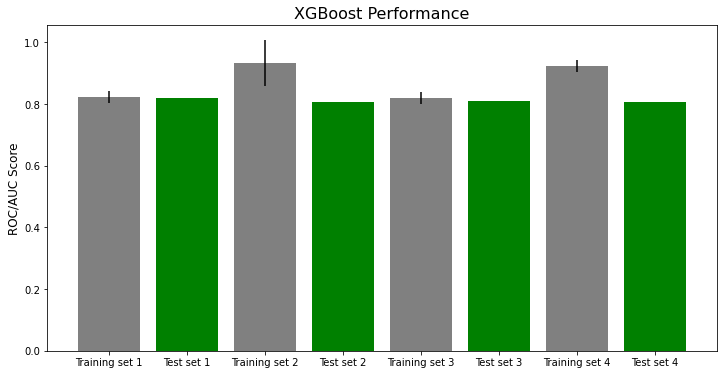

In [28]:
bars_xg = [scores_xg_1.mean(), 0.81940, scores_xg_2.mean(), 0.80623, scores_xg_3.mean(), 0.80994, scores_xg_4.mean(), 0.80764]
bar_categories_xg = ['Training set 1', 'Test set 1', 'Training set 2', 'Test set 2', 'Training set 3', 'Test set 3', 'Training set 4', 'Test set 4']
error_bars_xg = [scores_xg_1.std(), 0, scores_xg_2.std(), 0, scores_xg_3.std(), 0, scores_xg_3.std(), 0]

plt.figure(figsize=(12,6))
plt.bar(bar_categories_xg, bars_xg, yerr=error_bars_xg, color=['grey', 'green', 'grey', 'green', 'grey', 'green', 'grey', 'green'])
plt.ylabel('ROC/AUC Score', fontsize=12)
plt.title('XGBoost Performance', fontsize=16)

Text(0.5, 1.0, 'LightGBM Performance')

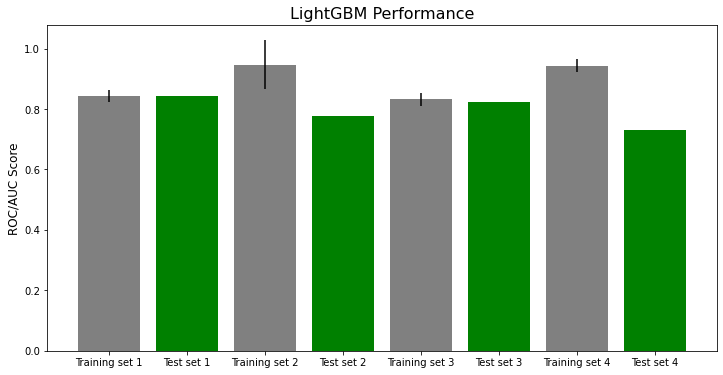

In [49]:
bars_lg = [scores_lg_1.mean(), 0.84252, scores_lg_2.mean(), 0.77793, scores_lg_3.mean(), 0.82252, scores_lg_4.mean(), 0.73104]
bar_categories_lg = ['Training set 1', 'Test set 1', 'Training set 2', 'Test set 2', 'Training set 3', 'Test set 3', 'Training set 4', 'Test set 4']
error_bars_lg = [scores_lg_1.std(), 0, scores_lg_2.std(), 0, scores_lg_3.std(), 0, scores_lg_3.std(), 0]

plt.figure(figsize=(12,6))
plt.bar(bar_categories_lg, bars_lg, yerr=error_bars_lg, color=['grey', 'green', 'grey', 'green', 'grey', 'green', 'grey', 'green'])
plt.ylabel('ROC/AUC Score', fontsize=12)
plt.title('LightGBM Performance', fontsize=16)

- Group 1 had the best performance for all models (features selected by Extra-Trees Regressor);
- LightGBM got the best score;
- We have an overfitting problem for groups 3 and 4 (when using SMOTE approach to deal with imbalanced class).

### LightGBM - Best Model

In [95]:
# plot feature importances|SHAP

import shap

def feature_imp(model, X_test):
    
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)
    
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    
    shap.dependence_plot("d1_glucose_max", shap_values[1], X_test)

    shap.dependence_plot("age", shap_values[1], X_test)

    shap.dependence_plot("glucose_apache", shap_values[1], X_test)

    shap.dependence_plot("bmi", shap_values[1], X_test)
    
    shap.dependence_plot("d1_glucose_min", shap_values[1], X_test)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


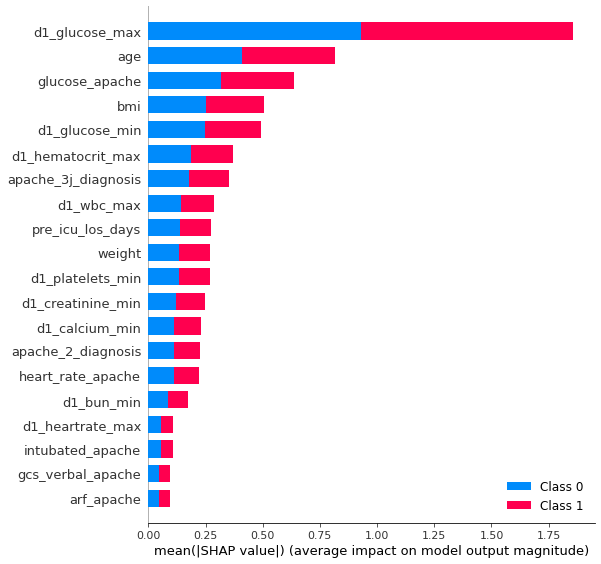

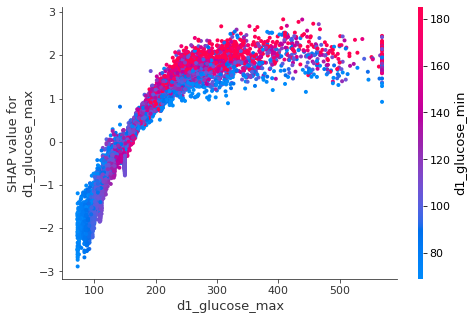

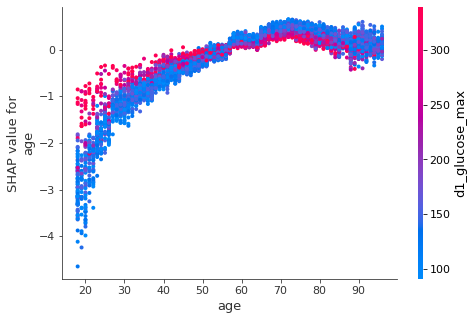

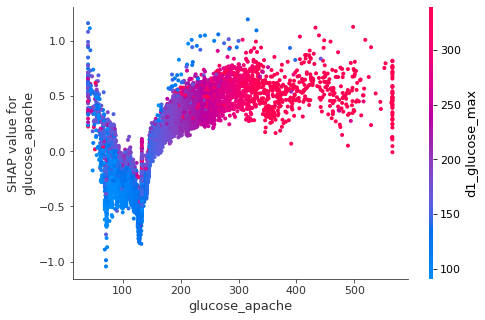

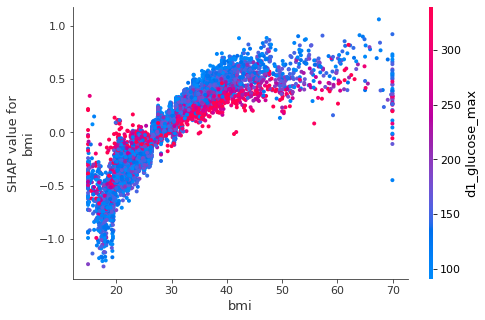

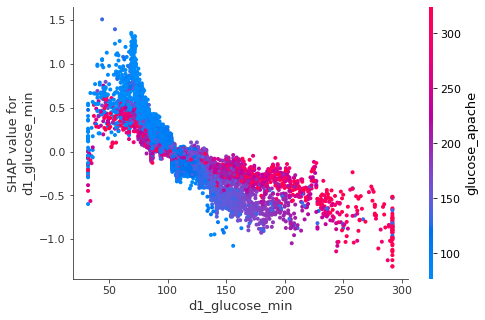

CPU times: user 3min 28s, sys: 849 ms, total: 3min 29s
Wall time: 58.9 s


In [97]:
%%time
model = lgbm.fit(train_1, train_y)
feature_imp(model, test_1)

# Model Tuning

In [99]:
from lightgbm import LGBMClassifier
lgbm2 = LGBMClassifier(alpha=1,
                    reg_lambda=1,
                    objective='binary',
                    metric='auc',
                    n_jobs=-1,
                    feature_fraction_seed=42,
                    bagging_seed=42,
                    boosting_type='gbdt',
                    boost_from_average=False,
                    is_unbalance=True,
                    learning_rate=0.01,
                    max_depth=3,
                    num_iterations=10000
                    )

In [ ]:
# from sklearn.model_selection import GridSearchCV
                           

# lgbm_param = {'learning_rate':[0.01, 0.05],
#               'max_depth':[3, 10],
#               'num_iterations':[5000, 10000]
#               }


# # Create GridSearch with CV=5 and scoring='roc_auc' for each model and n_jobs=-1

    
# gd_sr = GridSearchCV(estimator=lgbm2, param_grid=lgbm_param, scoring='roc_auc', cv=5, n_jobs=-1)
# gd_sr.fit(train_1, train_y)
# best_param = gd_sr.best_params_   

In [ ]:
#best_param = {'learning_rate': 0.01, 'max_depth': 3, 'num_iterations': 10000}

In [102]:
probs = train_predict(trainX, trainy, testX, lgbm2)
# calculate scores
lgbm2_auc = roc_auc_score(testy, probs)

# calculate roc curves
lgbm2_fpr, lgbm2_tpr, tr2 = roc_curve(testy, probs)

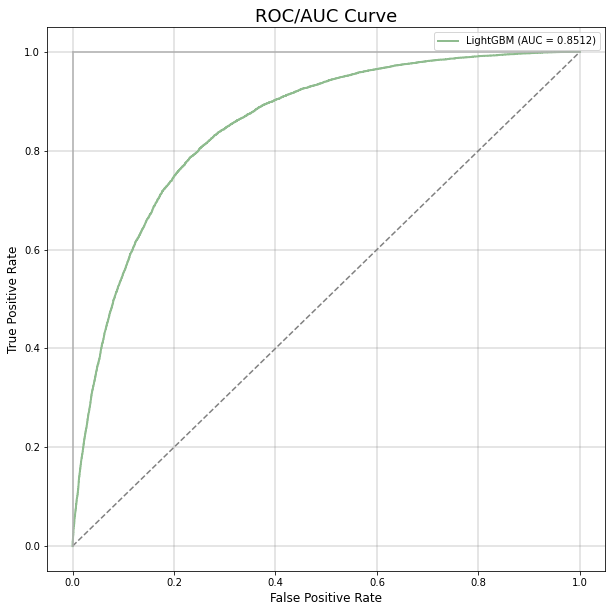

In [103]:
plt.figure(figsize=(10,10))
plt.title('ROC/AUC Curve', fontsize=18)
plt.plot(lgbm2_fpr, lgbm2_tpr, color='darkseagreen', label='LightGBM (AUC = %0.4f)' % ((lgbm2_auc)),lw=2, alpha=1)
plt.plot([0, 1], ls="--", color='grey')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate', fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.grid(b=True, which='major', color='grey', linewidth=0.4)
plt.legend(fontsize=10);

In [ ]:
# lgbm2.fit(train_1, train_y)
# predicted = train_predict(train_1, train_y, test_1, lgbm2)

In [ ]:
# icu_test_df['diabetes_mellitus'] = predicted
# icu_test_df[["encounter_id", "diabetes_mellitus"]].to_csv("submission_lgbm_tuned.csv", index=False)